In [102]:

df = read.delim("datall.txt", header = F, sep = "\t", dec = ".")


In [ ]:
# converting data into timeseries using ts() function

In [9]:

electronic_data_timeseries = ts(df[[1]],frequency = 12,start=c(2016,8))
electronic_data_timeseries

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,,,,,,,,2,6,3,4,8
2017,5,1,30,9,11,13,7,10,17,14,15,18
2018,19,12,35,16,22,25,23,24,20,26,21,27
2019,34,29,36,31,33,28,32,,,,,


In [ ]:
# plotting the electronic_data_timeseries 

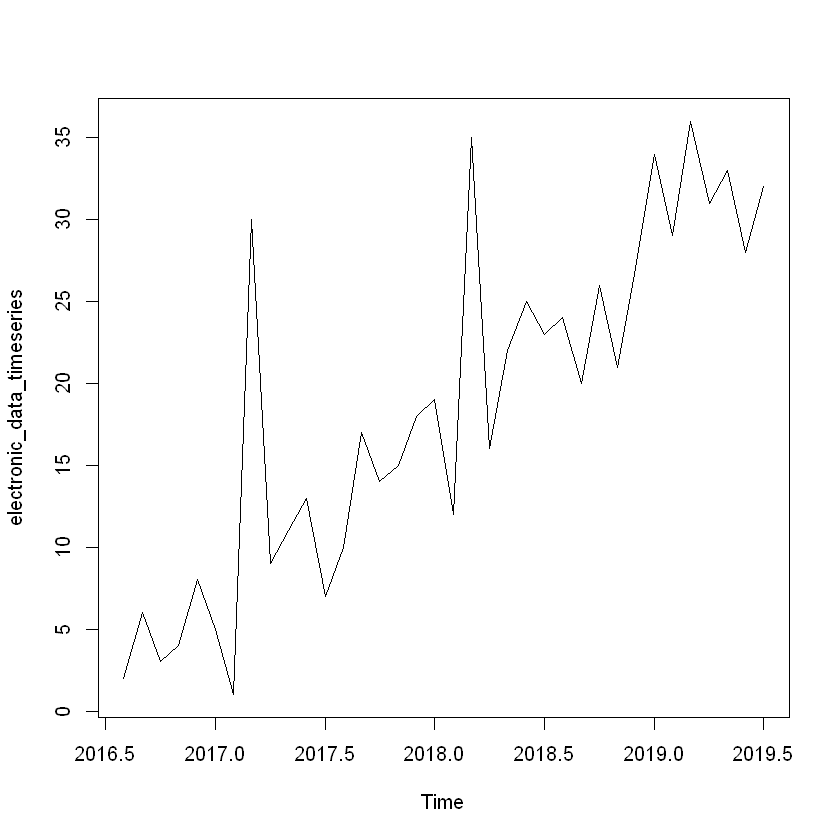

In [10]:
plot.ts(electronic_data_timeseries)

In [11]:
#Now expressing the time series into various components usin decompose function

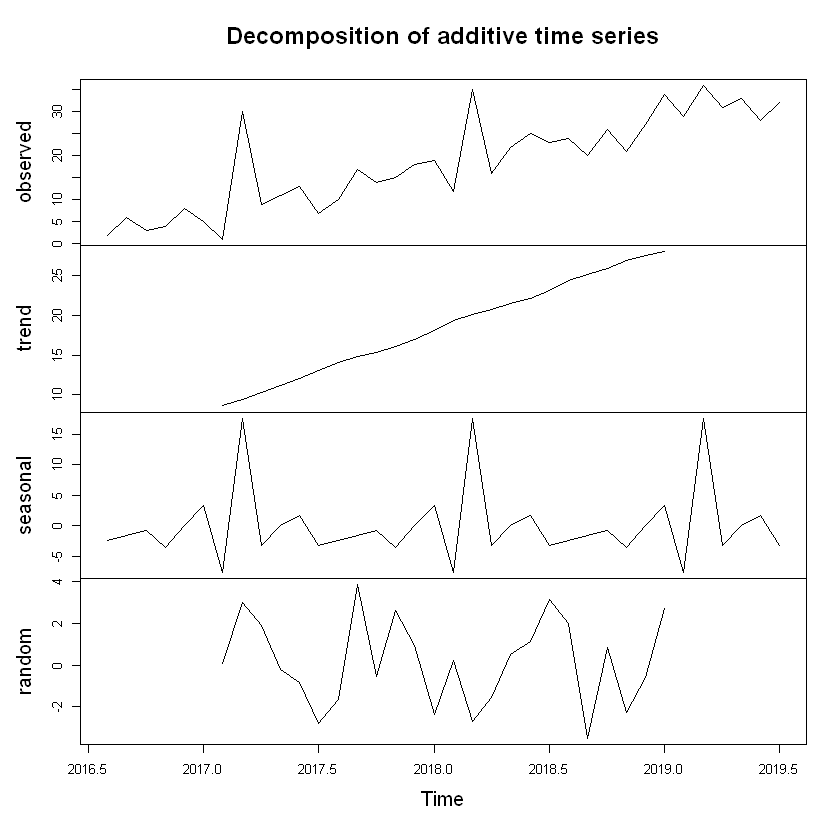

In [13]:
decom_electronic_data_timeseries = decompose(electronic_data_timeseries)
plot(decom_electronic_data_timeseries)

In [14]:
# now we have to make data time series data stationary for further analysis
# so we have to check whether our data is stationary or not
# this can be done by using Augmented dicker fuller test, which is present in "tseries" package of r
# importing tseries library

In [15]:
library(tseries)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [16]:
# now checking wether data is stationary or not by applying adf test

In [18]:
adf.test(electronic_data_timeseries)


	Augmented Dickey-Fuller Test

data:  electronic_data_timeseries
Dickey-Fuller = -3.3312, Lag order = 3, p-value = 0.08326
alternative hypothesis: stationary


In [19]:
# as it can be seen that p-value is greater than 0.05 , so we fail to reject the null hypothesis 
# Hence our timeseries is not stationary
# we will make Stationary by differencing
# usin diff() function

In [20]:
diff_electronic_timeseries = diff(electronic_data_timeseries)

In [21]:
# now again applying adf test to check the stationarity of the data


In [22]:
adf.test(diff_electronic_timeseries)


	Augmented Dickey-Fuller Test

data:  diff_electronic_timeseries
Dickey-Fuller = -3.5715, Lag order = 3, p-value = 0.04944
alternative hypothesis: stationary


In [23]:
# Now it can be seen that p-value is less than 0.05
# hence our data is stationary now
# it is ready for further analysis

In [24]:
# now we will be forecast the time series data by different methods 
# so we need library called  "forecast" in R which is used for forecasting


In [25]:
library(forecast)

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


In [26]:
# first we will test the root mean square error for the different methods and choose the best of them accordingly
# first we will apply naive based method

In [47]:
model_1 = naive(diff_electronic_timeseries)

In [30]:
# now checking the root mean square error of the model by accuracy function

In [48]:
accuracy(model_1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0,16.18096,11.17647,204.9172,222.5643,2.235294,-0.7150079


In [32]:
# so we get RMSE = 8.889802 of naive based

In [33]:
# now for simple exponential smoothning

In [49]:
model_2 = ses(diff_electronic_timeseries)

In [50]:
accuracy(model_2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.0006706582,8.848825,5.943036,87.63639,87.63639,1.188607,-0.6278881


In [36]:
# we get RMSE =6.629548

In [37]:
# for holt linear method 

In [51]:
model_3= holt(diff_electronic_timeseries)

In [52]:
accuracy(model_3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.1468971,8.853854,5.95478,84.03497,88.87396,1.190956,-0.6268046


In [40]:
# rmse = 8.853854

In [41]:
# for holt winter method

In [53]:
model_4 = hw(diff_electronic_timeseries)

In [54]:
accuracy(model_4)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.01623161,5.262136,3.372169,11.76447,81.66449,0.6744337,-0.4626286


In [125]:
# rmse 5.262136


In [110]:
seas_adj_data = electronic_data_timeseries - decom_electronic_data_timeseries$seasonal

In [146]:
adf.test(seas_adj_data)

Warning message in adf.test(seas_adj_data):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  seas_adj_data
Dickey-Fuller = -4.3445, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


In [144]:
model_5=auto.arima(seas_adj_data,seasonal=F)
model_5

Series: seas_adj_data 
ARIMA(2,1,0) with drift 

Coefficients:
          ar1      ar2   drift
      -0.8858  -0.5909  0.7824
s.e.   0.1349   0.1350  0.2543

sigma^2 estimated as 14.44:  log likelihood=-95.44
AIC=198.87   AICc=200.21   BIC=205.1

In [141]:
accuracy(model_5)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.0039474,3.582899,2.470404,-10.52951,23.52353,0.2449988,-0.1001775


In [142]:
fcast = forecast(model_5,h=10)

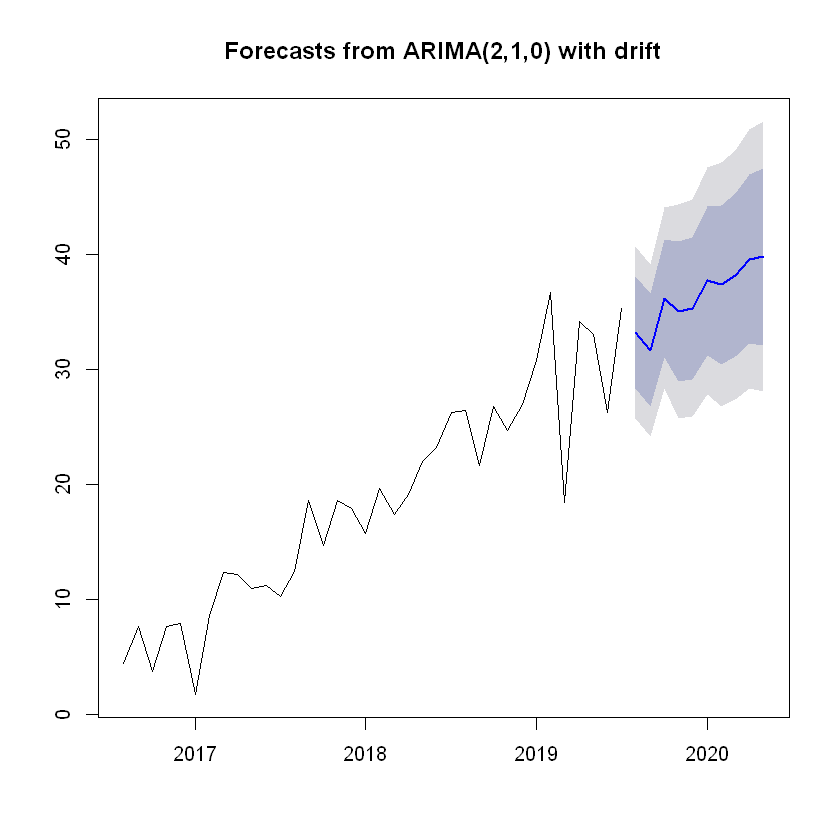

In [143]:
plot(fcast)

In [154]:
df1 = read.delim("cashdata1.txt", header = F, sep = "\t", dec = ".")
df2=df1[[1]]*1000
cash_data_timeseries = ts(df2,frequency = 12,start=c(2016,7))
decomp = decompose(cash_data_timeseries)
seas_adj_data = cash_data_timeseries-decomp$seasonal
auto.arima(seas_adj_data,seasonal=F)
adf.test(seas_adj_data)



                                             


Series: seas_adj_data 
ARIMA(0,1,0) 

sigma^2 estimated as 7.919e+16:  log likelihood=-855.84
AIC=1713.69   AICc=1713.79   BIC=1715.4


	Augmented Dickey-Fuller Test

data:  seas_adj_data
Dickey-Fuller = -3.9516, Lag order = 3, p-value = 0.02114
alternative hypothesis: stationary


In [150]:
model_7=auto.arima(seas_adj_data,seasonal=F)

In [158]:
fcast2 = forecast(model_7,h=5)

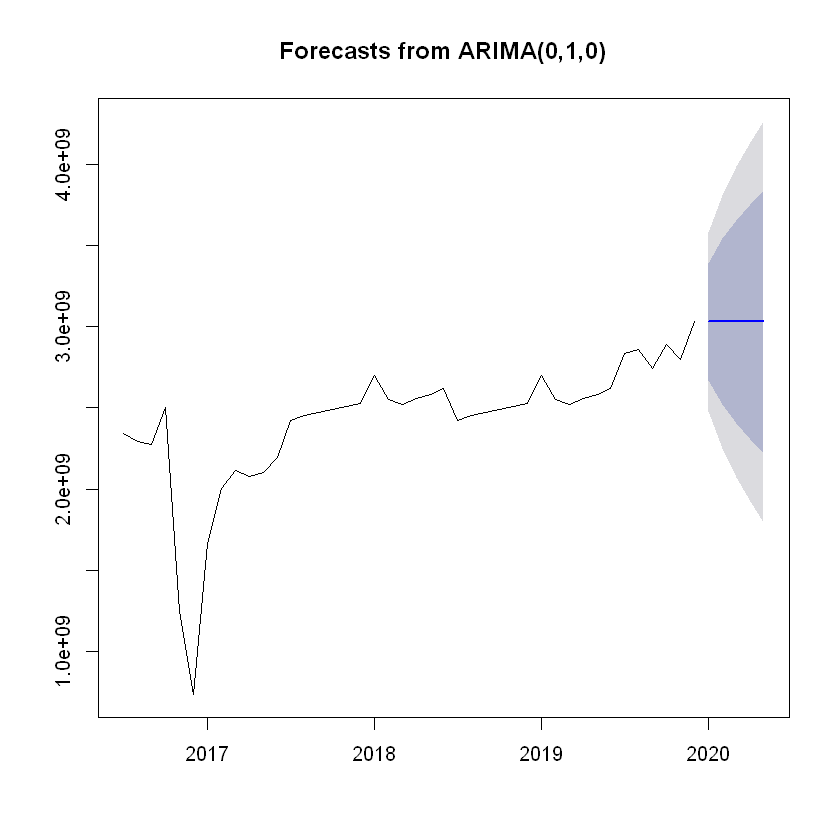

In [159]:
plot(fcast2)

In [160]:
getwd()

[1] "C:/Users/hp"